# Indexes and Broadcasting

what happens if you sum up a Serie with a Dataframe

In [1]:
import pandas as pd
import numpy as np
import cx_Oracle
max_movieid=1000

# Index in the SQL query


In [2]:
try:
    connection =cx_Oracle.connect(user='websem', password='websem108', 
                              dsn='tirpitz.ms.mff.cuni.cz:1511/jedenact.ms.mff.cuni.cz')
    movies=pd.read_sql_query('select * from MMOVIES WHERE MOVIEID>3 AND MOVIEID<{}'.format(max_movieid), connection,
                            index_col='MOVIEID')
except:
    movies= pd.read_json('data/mmovies.json')
    movies.set_index('MOVIEID',inplace=True)

movies.head(7)

C:\Users\marta\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,TITLE,GENRE,TT,CNT0,CNT,AVG,BAYESAVG
MOVIEID,,,,,,,
4,Waiting to Exhale (1995),Comedy|Drama|Romance\r,tt0114885,2756,2430,3,3
5,Father of the Bride Part II (1995),Comedy\r,tt0113041,12161,11042,3,3
6,Heat (1995),Action|Crime|Thriller\r,tt0113277,23899,21866,4,4
7,Sabrina (1995),Comedy|Romance\r,tt0114319,12961,11566,3,3
8,Tom and Huck (1995),Adventure|Children\r,tt0112302,1415,1163,3,3
9,Sudden Death (1995),Action\r,tt0114576,3960,3228,3,3
10,GoldenEye (1995),Action|Adventure|Thriller\r,tt0113189,29005,26853,3,3


### Apply a function to each value

In [3]:
np.exp(movies.AVG)

MOVIEID
4      20.085537
5      20.085537
6      54.598150
7      20.085537
8      20.085537
         ...    
994    54.598150
996    20.085537
997    54.598150
998    20.085537
999    20.085537
Name: AVG, Length: 978, dtype: float64

### The difference of two columns

In [4]:
(movies.CNT0-movies.CNT).head()

MOVIEID
4     326
5    1119
6    2033
7    1395
8     252
dtype: int64

## The index in the Series is preserved, not the order

Consider two Series with missing values; the operation is applied by the index

In [5]:
u_sums = pd.Series({'Hobit': 1000, 'Rebels': 2000,
                  'Havel': 700}, name='SUMS')
u_cnts = pd.Series({'Rebels': 450,'Hobit': 250, 'Star Wars': 400}, name='CNTS')

In [6]:
u_sums/u_cnts

Havel             NaN
Hobit        4.000000
Rebels       4.444444
Star Wars         NaN
dtype: float64

### The resulting index is the union of indices

In [7]:
u_sums.index.union(u_cnts.index) 

Index(['Havel', 'Hobit', 'Rebels', 'Star Wars'], dtype='object')

### Without an index the order matters

the second series is sorted alphabetically from the construction

In [8]:
u_sums.reset_index().SUMS/u_cnts.reset_index().CNTS

0    2.222222
1    8.000000
2    1.750000
dtype: float64

### Similarly in two dimensions for a DataFrame

In [9]:
rng = np.random.RandomState(42)
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
A

,A,B
0,6,19
1,14,10


In [10]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
B

,B,A,C
0,7,4,6
1,9,2,6
2,7,4,3


In [33]:
A + B

,A,B,C
0,10.0,26.0,NaN
1,16.0,19.0,NaN
2,NaN,NaN,NaN


## Fill the missing values in A by A's mean

In [12]:
fill = A.stack().mean()
print('fill for missing={}'.format(fill))
A.add(B, fill_value=fill)

fill for missing=12.25


,A,B,C
0,10.00,26.00,18.25
1,16.00,19.00,18.25
2,16.25,19.25,15.25


## Broadcasting

in object with different dimensions like a DataFrame and a Series

### Substract the first row from each row in the matrix A


In [13]:
A - A.iloc[0]

,A,B
0,0,0
1,8,-9


### Substract the 'B' column from each column in the matrix A

In [14]:
A.subtract(A['B'],axis=0)

,A,B
0,-13,0
1,4,0


## For two DataFrames, the index matters (not the order)

In [15]:
M = pd.DataFrame(rng.randint(10, size=(3, 4)), columns=list('QRST'))
M

,Q,R,S,T
0,7,7,2,5
1,4,1,7,5
2,1,4,0,9


### We create a smaller Series

In [16]:
halfrow = M.iloc[0, ::2]
halfrow

Q    7
S    2
Name: 0, dtype: int32

In [17]:
M - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-3.0,NaN,5.0,NaN
2,-6.0,NaN,-2.0,NaN


In [18]:
halfrow.shape

(2,)

In [19]:
M.shape

(3, 4)

https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html

Python Data Science Handook


C:\Users\marta\AppData\Local\Temp\ipykernel_12856\3725689841.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import Image, display


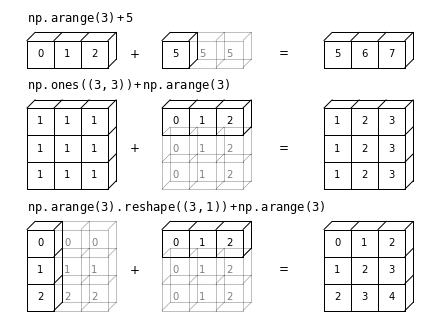

In [20]:
from IPython.core.display import Image, display
print('Python Data Science Handook')
display(Image('figures/02.05-broadcasting.png', width=1900))

# Multiindex

In [21]:
try:
    connection =cx_Oracle.connect(user='websem', password='websem108', 
                              dsn='tirpitz.ms.mff.cuni.cz:1511/jedenact.ms.mff.cuni.cz')
    ratings=pd.read_sql_query('''select * from MRATINGS 
                            WHERE MOVIEID<{} AND USERID<50
                           ORDER BY MOVIEID, USERID
'''.format(max_movieid)
                          ,connection,index_col=['MOVIEID','USERID'])
except:
    ratings=pd.read_json('data/ratings.json')
    ratings.set_index(['MOVIEID','USERID'],inplace=True)
ratings.head()

C:\Users\marta\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


RATING          TS                  DT  TOP5    K  DTYY  DTMM  \
MOVIEID USERID                                                                  
1       3          4.0   944919407 1999-12-11 13:36:47  None   81  1999    12   
        6          5.0   858275452 1997-03-13 17:50:52  None   18  1997     3   
        8          4.0   833981871 1996-06-05 13:37:51  None   45  1996     6   
        10         4.0   943497887 1999-11-25 02:44:47  None    5  1999    11   
        11         4.5  1230858821 2009-01-02 01:13:41  None  138  2009     1   

                DTDW  DTHH  KTT TRAIN TEST  DIFF  
MOVIEID USERID                                    
1       3          7    13   81     A    N   0.0  
        6          5    17   18     A    N   1.0  
        8          4    13   45     A    N   0.0  
        10         5     2    5     N    A   NaN  
        11         6     1  138     A    N   0.5

### Drop: drops selected rows or columns

    axis=0 rows
    axis=1 dolumns
    
### inplace=True

    updates current DataFrame

In [22]:
ratings.drop(['TS','TOP5','K','KTT','TRAIN','TEST','DIFF'],axis=1, inplace=True)

In [23]:
ratings.head()

RATING                  DT  DTYY  DTMM  DTDW  DTHH
MOVIEID USERID                                                    
1       3          4.0 1999-12-11 13:36:47  1999    12     7    13
        6          5.0 1997-03-13 17:50:52  1997     3     5    17
        8          4.0 1996-06-05 13:37:51  1996     6     4    13
        10         4.0 1999-11-25 02:44:47  1999    11     5     2
        11         4.5 2009-01-02 01:13:41  2009     1     6     1

In [24]:
ratings.index[:10]

MultiIndex([(1,  3),
            (1,  6),
            (1,  8),
            (1, 10),
            (1, 11),
            (1, 12),
            (1, 13),
            (1, 14),
            (1, 16),
            (1, 19)],
           names=['MOVIEID', 'USERID'])

Who rated MOVIEID==1

In [25]:
ratings.loc[1]

,RATING,DT,DTYY,DTMM,DTDW,DTHH
USERID,,,,,,
3,4.0,1999-12-11 13:36:47,1999,12,7,13
6,5.0,1997-03-13 17:50:52,1997,3,5,17
8,4.0,1996-06-05 13:37:51,1996,6,4,13
10,4.0,1999-11-25 02:44:47,1999,11,5,2
11,4.5,2009-01-02 01:13:41,2009,1,6,1
12,4.0,1997-03-22 20:48:38,1997,3,7,20
13,4.0,1996-11-27 08:21:31,1996,11,4,8
14,4.5,2008-10-29 20:13:59,2008,10,4,20
16,3.0,2001-05-27 13:22:52,2001,5,1,13


### Addressing by a MultiIndex

In [26]:
ratings.loc[(1,13)] # MOVIEID==1, USERID==13

RATING                    4.0
DT        1996-11-27 08:21:31
DTYY                     1996
DTMM                       11
DTDW                        4
DTHH                        8
Name: (1, 13), dtype: object

### Select by order

    the first three rows, the first two columns, the index does not matter

In [27]:
ratings.iloc[:5,:2] #first three rows, first two columns, the index does not matter

RATING                  DT
MOVIEID USERID                            
1       3          4.0 1999-12-11 13:36:47
        6          5.0 1997-03-13 17:50:52
        8          4.0 1996-06-05 13:37:51
        10         4.0 1999-11-25 02:44:47
        11         4.5 2009-01-02 01:13:41

In [28]:
ratings.iloc[4]

RATING                    4.5
DT        2009-01-02 01:13:41
DTYY                     2009
DTMM                        1
DTDW                        6
DTHH                        1
Name: (1, 11), dtype: object

## Select only according the second level of an MultiIndex

In [29]:
ratings[ratings.index.get_level_values('USERID')==11]

,,RATING,DT,DTYY,DTMM,DTDW,DTHH
MOVIEID,USERID,,,,,,
1,11,4.5,2009-01-02 01:13:41,2009,1,6,1
10,11,2.5,2009-01-02 01:15:59,2009,1,6,1
19,11,3.5,2009-01-01 04:21:44,2009,1,5,4
32,11,5.0,2009-01-01 04:11:35,2009,1,5,4
39,11,4.5,2009-01-02 01:17:12,2009,1,6,1
...,...,...,...,...,...,...,...
784,11,3.5,2009-01-01 23:52:27,2009,1,5,23
828,11,4.0,2009-01-01 04:27:01,2009,1,5,4
858,11,2.5,2009-01-02 01:15:24,2009,1,6,1


### Switch the level order in a MultiIndex

In [30]:
ratings.reset_index(inplace=True)
ratings.set_index(['USERID','MOVIEID'],inplace=True)

In [31]:
ratings.head()

,,RATING,DT,DTYY,DTMM,DTDW,DTHH
USERID,MOVIEID,,,,,,
3,1,4.0,1999-12-11 13:36:47,1999,12,7,13
6,1,5.0,1997-03-13 17:50:52,1997,3,5,17
8,1,4.0,1996-06-05 13:37:51,1996,6,4,13
10,1,4.0,1999-11-25 02:44:47,1999,11,5,2
11,1,4.5,2009-01-02 01:13:41,2009,1,6,1


In [32]:
ratings.loc[11]

,RATING,DT,DTYY,DTMM,DTDW,DTHH
MOVIEID,,,,,,
1,4.5,2009-01-02 01:13:41,2009,1,6,1
10,2.5,2009-01-02 01:15:59,2009,1,6,1
19,3.5,2009-01-01 04:21:44,2009,1,5,4
32,5.0,2009-01-01 04:11:35,2009,1,5,4
39,4.5,2009-01-02 01:17:12,2009,1,6,1
...,...,...,...,...,...,...
784,3.5,2009-01-01 23:52:27,2009,1,5,23
828,4.0,2009-01-01 04:27:01,2009,1,5,4
858,2.5,2009-01-02 01:15:24,2009,1,6,1
